# 1.3.3 인구에 따른 살인 비율의 위치 추정

* 패키지 설치 `install.packages("dplyr", dependencies=TRUE)`

In [2]:
state <- read.csv(file="raw_data/state.csv")

평균

In [3]:
mean(state[["Population"]])

[1] 6162876

절사 평균(10%)

In [4]:
mean(state[["Population"]], trim=0.1)

[1] 4783697

중간값

In [5]:
median(state[["Population"]])

[1] 4436370

In [6]:
install.packages("matrixStats", dependencies=TRUE)

package 'matrixStats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LG\AppData\Local\Temp\RtmpkRf6ul\downloaded_packages


가중평균

In [7]:
weighted.mean(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.445834

In [8]:
library("matrixStats")

Warning message:
"package 'matrixStats' was built under R version 3.6.3"

In [9]:
weightedMedian(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.4

# 1.4.3 주별 인구의 변위 추정

표준편차

In [10]:
sd(state[["Population"]]) 

[1] 6848235

사분위범위

In [11]:
IQR(state[["Population"]])

[1] 4847308

중위절대편차

In [12]:
mad(state[["Population"]])

[1] 3849870

표준편차는 MAD의 거의 두배가 된다. 왜냐하면 표준편차는 특잇값에 민감하기 때문이다.

# 1.5.1 백분위수와 상자그림

In [13]:
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

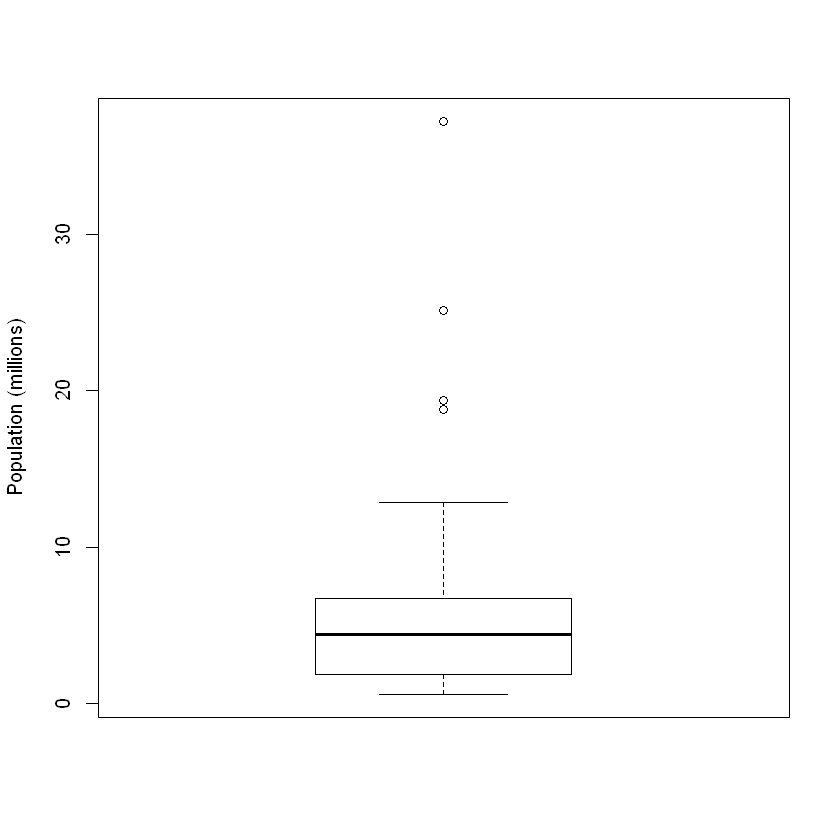

In [14]:
boxplot(state[["Population"]]/1000000, ylab="Population (millions)")

# 1.5.2 도수분포표와 히스토그램

In [15]:
breaks <- seq(from=min(state[["Population"]]),
             to=max(state[["Population"]]), length=11)
pop_freq <- cut(state[["Population"]], breaks=breaks,
               right=TRUE, include.lowest = TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

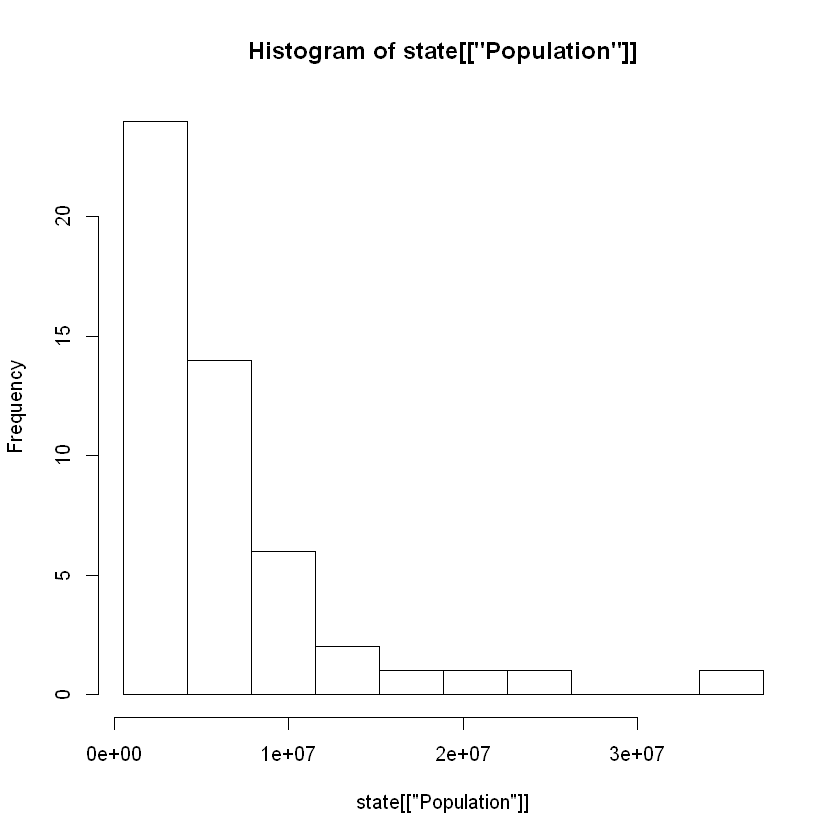

In [16]:
hist(state[["Population"]], breaks=breaks)

# 1.5.3 밀도 추정

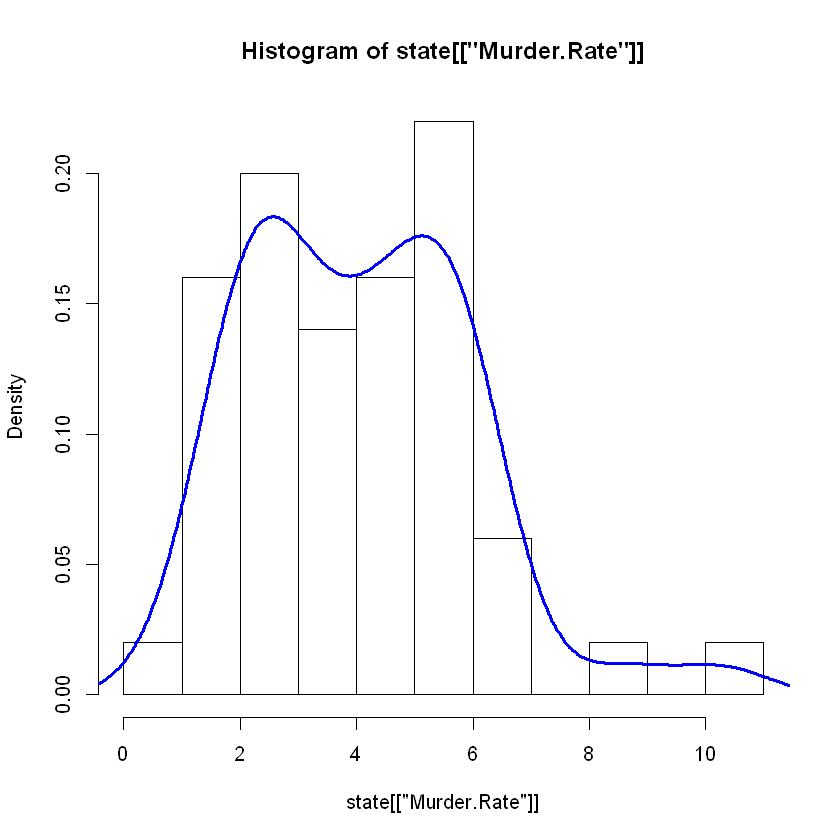

In [17]:
hist(state[["Murder.Rate"]], freq=FALSE)
lines(density(state[["Murder.Rate"]]), lwd=3, col="blue")

# 1.6 이진 데이터와 범주 데이터 탐색하기

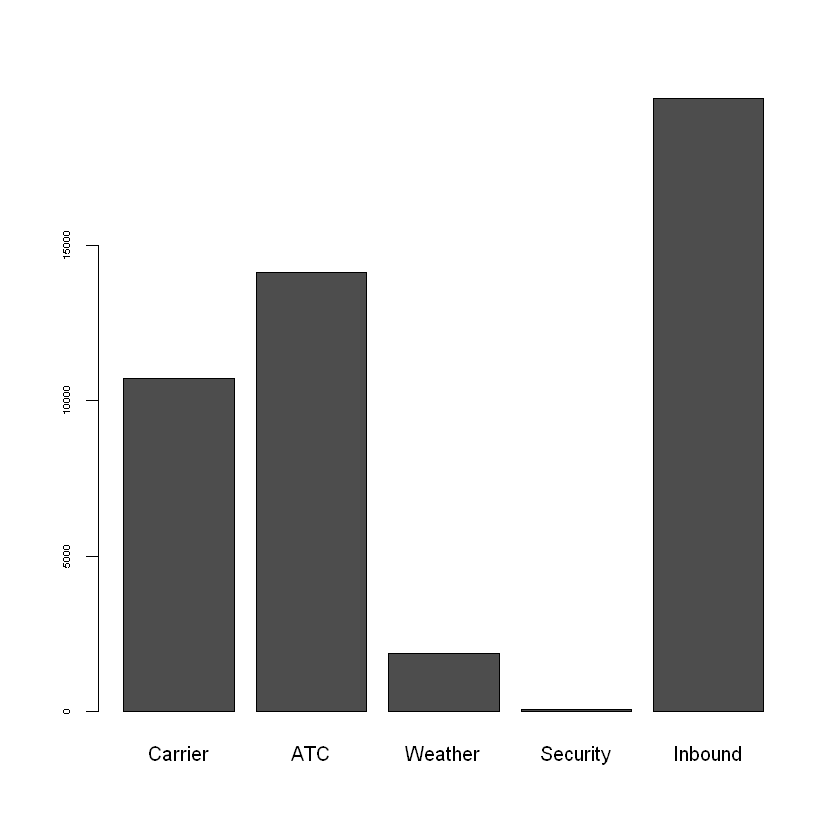

In [19]:
dfw <- read.csv(file="raw_data/dfw_airline.csv")
barplot(as.matrix(dfw)/6, cex.axis=.5)

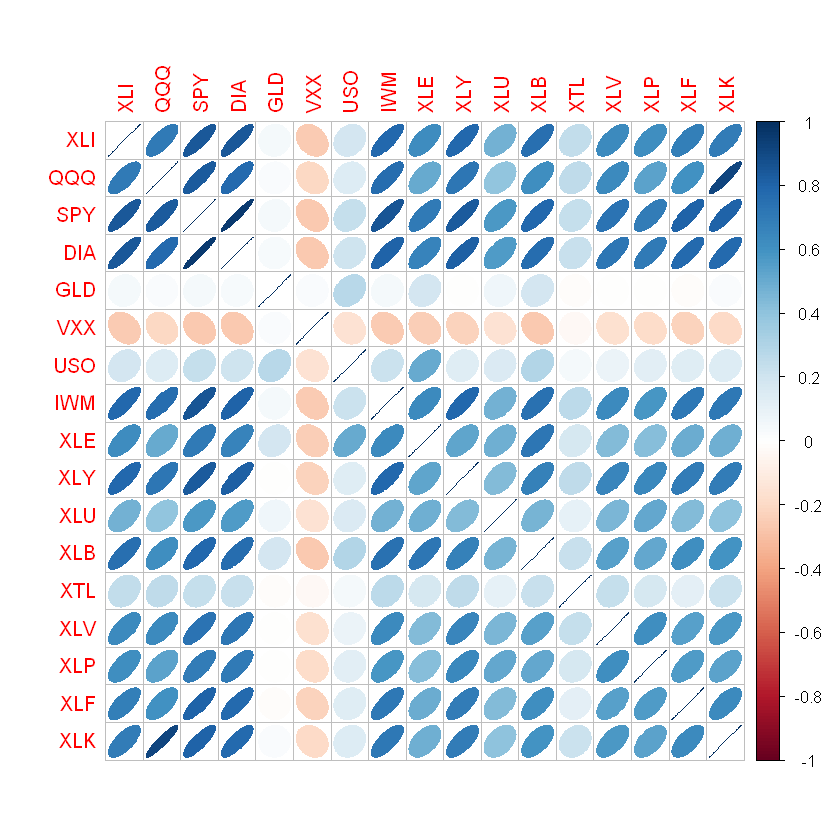

In [24]:
sp500_px <- read.csv(file="raw_data/sp500_px.csv")
sp500_sym <- read.csv(file="raw_data/sp500_sym.csv", stringsAsFactors = FALSE)
etfs<-sp500_px[row.names(sp500_px)>"2012-07-01",
             sp500_sym[sp500_sym$sector=="etf", 'symbol']]

library(corrplot)
corrplot(cor(etfs), method="ellipse")

얇고 진할수록 더 강한 상관관계를 나타낸다. 상관계수는 데이터의 특잇값에 민감하다.

# 1.7.1 산점도

In [32]:
telecom <- sp500_px[, sp500_sym[sp500_sym$sector=="telecommunications_services", 'symbol']]
telecom <- telecom[row.names(telecom)>"2012-07-01", ]
telecom_cor <- cor(telecom)

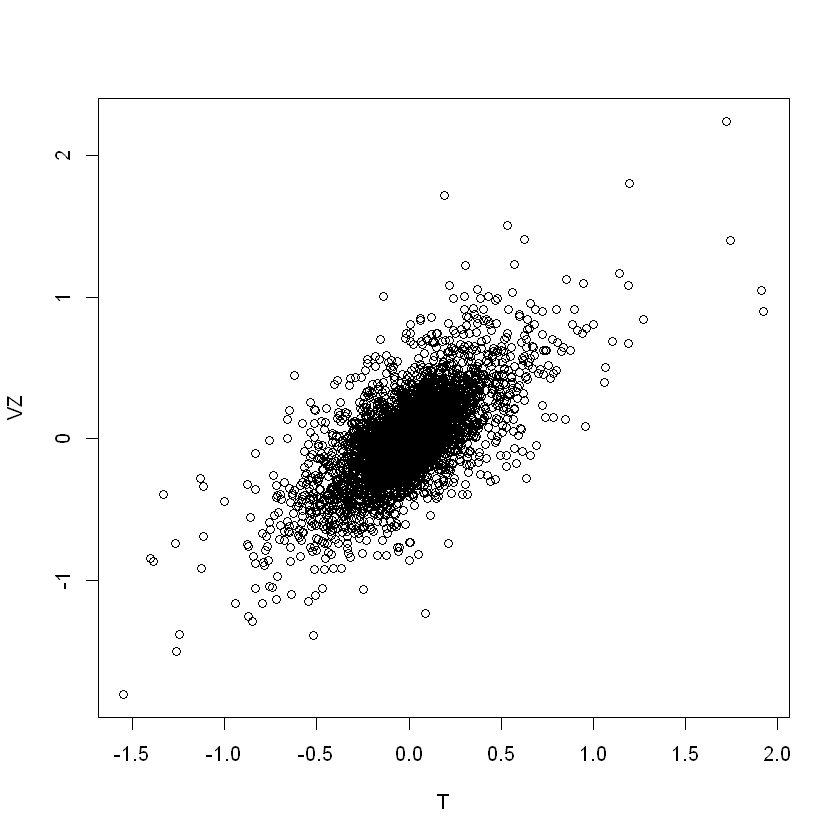

In [33]:
plot(telecom$T, telecom$VZ, xlab="T", ylab="VZ")